In [26]:
%matplotlib inline

# Imports of the Qiskit basic functionalities
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile
from qiskit.primitives import Sampler
from qiskit.quantum_info import Statevector, random_statevector
from qiskit.visualization import plot_distribution, plot_histogram
from qiskit.circuit import Parameter
from qiskit.providers.basic_provider import BasicSimulator

import numpy as np
from fractions import Fraction
from math import gcd, asin, sqrt


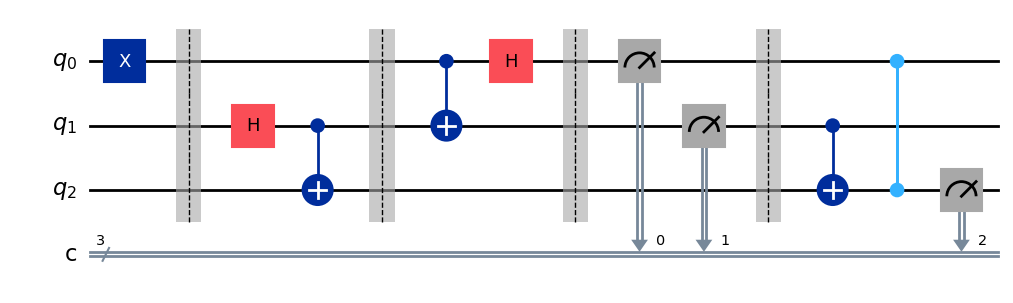

In [31]:
# Teleportation

qc = QuantumCircuit(3,3)

# QUBIT ORDERING
# q0 = State |psi> that we want to teleport
# q1 = Alice's half of the Bell pair
# q2 = Bob's half of the Bell pair, the destination of the teleportation

# ========================
# Step 0: Create the state to be teleported in qubit 0
qc.x(0) # qubit 0 is now in state |1>, and this is the state that we want to teleport

qc.barrier() # just a visual aid

# ========================
# Step 1: create an entangled Bell pair between Alice and Bob (qubits 1 and 2)
qc.h(1)
qc.cx(1,2)

qc.barrier() # just a visual aid

# ========================
# Step 2: Alice applies a series of operations 
# between the state to teleport (qubit 0) and her half of the Bell pair (qubit 1)
qc.cx(0,1)
qc.h(0)

qc.barrier() # just a visual aid

# ========================
# Step 3: Alice measures both qubits 0 and 1
qc.measure([0, 1], [0, 1]) # results stored in classical bits 0 and 1, respectively

qc.barrier() # just a visual aid

# ========================
# Step 4: Now that Alice has measured the two qubits, their states have collapsed to 0 and 1. 
# Bob can do operations conditioned on these qubits to his half of the Bell pair
# Note that while we're conditioning Bob's operation on the collapsed qubits 0 and 1, we can
# do teleportation over long distances by transmitting the classical information in classical bits 0 and 1
qc.cx(1, 2)
qc.cz(0, 2)

# Step 5: Done! Measure Bob's qubit to find out what state it is in
qc.measure([2], [2])

%matplotlib inline
qc.draw(output='mpl')



{'000': 258, '010': 271, '001': 235, '011': 260}


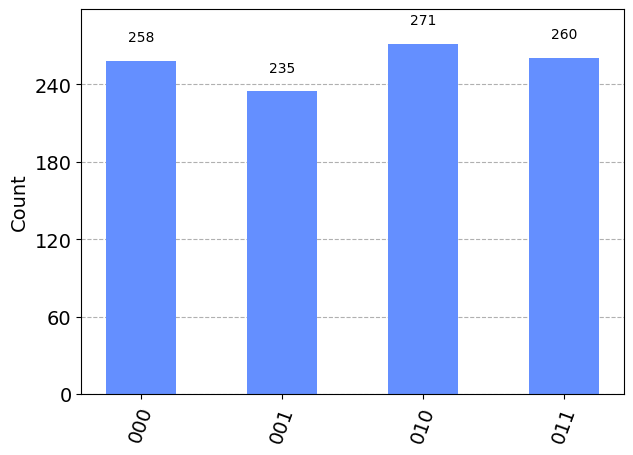

In [29]:
# Specify the backend (the simulator)
simulator = BasicSimulator()

# Transpile the circuit for the simulator
compiled_circuit = transpile(qc, simulator)

# Run the compiled circuit
job = simulator.run(compiled_circuit)

# Get the result
result = job.result()

# Print the counts
print(result.get_counts())

# Plot the histogram
plot_histogram(result.get_counts())

In [ ]:
# Deutsch-Jozsa

# Choose a type of oracle at random. With probability half it is constant, 
# and with the same probability it is balanced
oracleType, oracleValue = np.random.randint(2), np.random.randint(2)

if oracleType == 0:
    print("The oracle returns a constant value ", oracleValue)
else:
    print("The oracle returns a balanced function")
    a = np.random.randint(1,2**n) # this is a hidden parameter for balanced oracle. 